# The `Dataset` object

To illustrate extreme value theory, this tutorial will focus on an example time-series dataset.
The example dataset will contain normally distributed time-series, but the positive tail has a Pareto(2.5) distribution superimposed.
The behaviour of this power law tail is under investigation in this tutorial series.

The `Dataset` object forms the basis of extreme value analysis in this package.
At its core is a `pd.Series` in the `self.series` attribute.
The dataset performs checks on the series so that the rest of the package can safely make assumptions about data quality.
The checks are:

* the data cannot contain `nan`s,
* the data cannot contain non-finite values,
* the data cannot contain duplicate values.

In this notebook, the dataset will be generated and its properties will be investigated using generic plots.

In [1]:
from evt.dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pareto, norm

N_DATAPOINTS = 100000  # number of datapoints in the example set
NORMAL_STD = 5  # standard deviation of the normal distribution
PARETO_SHAPE = 2.5  # shape parameter of the Pareto distribution
EXAMPLE_NAME = 'Values'  # for nicer plots
EXAMPLE_INDEX_NAME = 'Index'

np.random.seed(0)  # enforce deterministic behaviour

series = pd.Series(
    norm.rvs(scale=NORMAL_STD, size=N_DATAPOINTS) + pareto.rvs(PARETO_SHAPE, size=N_DATAPOINTS),
    name=EXAMPLE_NAME
)
series.index.name = EXAMPLE_INDEX_NAME

dataset = Dataset(series)

The series is stored in the `.series` attribute.

In [2]:
dataset.series

Index
0        10.692793
1         3.219789
2         7.532751
3        13.398336
4        10.375184
           ...    
99995    -0.664820
99996    -9.044557
99997     4.757104
99998     2.966050
99999    -5.337815
Name: Values, Length: 100000, dtype: float64

When working with data, always plot the dataset. The `Dataset` supports simply plotting against its index. Moreover, it is possible to plot a boxplot of the values, to get a grip on quantiles.

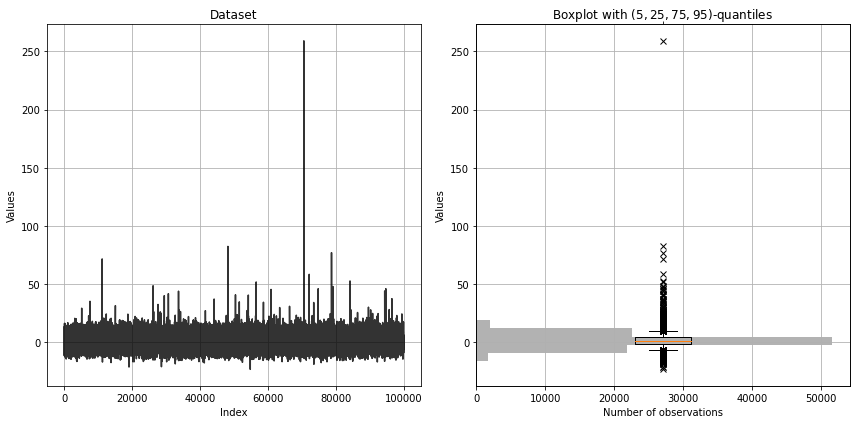

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

dataset.plot_dataset(ax1)
dataset.plot_boxplot(ax2)

fig.tight_layout()
plt.show()

The boxplot raises the suspicion the right side of the distribution could be fat tailed.
The convergence behaviour of sample moments can be investigated as a next step.

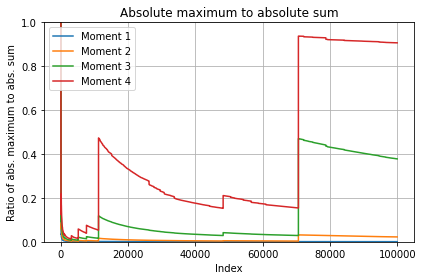

In [4]:
fig, ax = plt.subplots()

dataset.plot_maximum_to_sum(ax)

fig.tight_layout()
plt.show()

The third and fourth moment do not seem to converge.
This could be a signal of a tail with an index between 2 and 3.

Finally, let's determine what a good threshold would be for the peaks over threshold method.
This can be done using a mean excess plot.

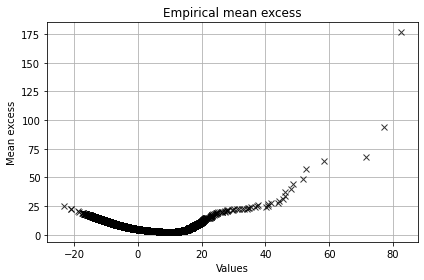

In [5]:
fig, ax = plt.subplots()

dataset.plot_mean_excess(ax)

fig.tight_layout()
plt.show()

After careful consideration of the mean excess graph, a guess for the threshold could be a value of 15.
In the next notebook, the peaks over threshold method will be illustrated.